공부 시간, 과외 시간과 성적 사이의 관계는 좌표로 나타낼 때 형태가 직선으로 해결되는 선형 회귀를 사용하기에 적합했었다.  
공부 시간에 따른 점수가 아닌 합격 여부로 발표되는 시험이 있을 경우 직선으로 해결하기에는 적합하지 못한 문제가 발생된다.  
이럴때 사용하는 로지스틱 회귀는 참과 거짓 중에 하나를 내놓는 과정으로 참과 거짓을 구분한 'S'자를 눕혀놓은 형태의 선을 그어주는 작업이다.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


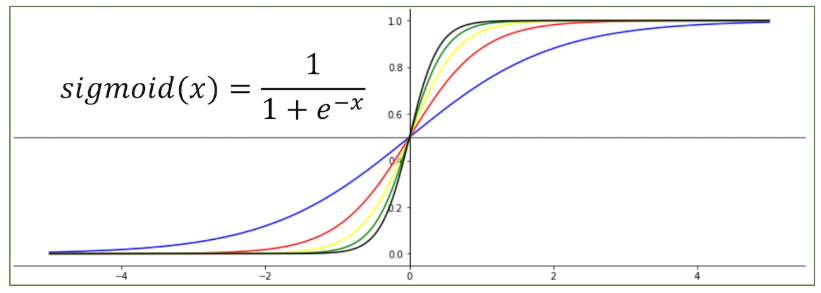

In [2]:
from IPython.display import Image
Image('./sigmoid.png', width=800)

참조  
http://taewan.kim/post/sigmoid_diff/  
https://devlog.jwgo.kr/2018/04/16/sigmoid-graph-according-to-slope-change/

In [3]:
# 공부 시간(x), 합격 여부(y) => [공부 시간, 합격 여부]
data = [[2, 0], [4, 0], [6, 0], [8, 1], [10, 1], [12, 1], [14, 1]]
xData = [i[0] for i in data] # 공부 시간
yData = [i[1] for i in data] # 합격 여부

In [4]:
# 기울기(a)와 y절편(b) 값을 랜덤한 값으로 정한다.
a = tf.Variable(tf.random_normal([1], dtype=tf.float64))
b = tf.Variable(tf.random_normal([1], dtype=tf.float64))
sess = tf.Session()
sess.run(tf.global_variables_initializer())
print('a: {}, b: {}'.format(sess.run(a), sess.run(b)))

a: [0.53997497], b: [-0.47972266]


시그모이드 방정식

In [5]:
# np.e : 넘파이에서 지수 값(2.718281828459045)을 의미하는 상수
# print(np.e)
y = 1 / (1 + np.e ** -(a * xData + b))

시그모이드 방정식의 오차를 계산하는 함수를 만든다.  
시그모이드 함수의 특성은 예측값(y)이 항상 0 아니면 1 이다.

In [6]:
loss = -tf.reduce_mean(np.array(yData) * tf.log(y) + (1 - np.array(yData)) * tf.log(1 - y))

오차를 최소로 하는 값을 찾는다.

In [17]:
gradient_descent = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

학습 시킨다.

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(300001):
    sess.run(gradient_descent)
    if i % 5000 == 0:
        # 학습 횟수(Epoch), 오차, 기울기, y절편
        print('Epoch: {0:6d}, loss: {1:8.4f}, 기울기: {2:8.4f}, y절편: {3:8.4f}'.format(i, sess.run(loss), sess.run(a)[0],
                                                                                  sess.run(b)[0]))

Epoch:      0, loss:   1.0445, 기울기:  -0.1572, y절편:   0.9431
Epoch:   5000, loss:   0.0585, 기울기:   1.5525, y절편: -10.6788
Epoch:  10000, loss:   0.0372, 기울기:   2.0063, y절편: -13.8778
Epoch:  15000, loss:   0.0275, 기울기:   2.3156, y절편: -16.0509
Epoch:  20000, loss:   0.0218, 기울기:   2.5529, y절편: -17.7161
Epoch:  25000, loss:   0.0180, 기울기:   2.7457, y절편: -19.0689
Epoch:  30000, loss:   0.0154, 기울기:   2.9083, y절편: -20.2087
Epoch:  35000, loss:   0.0134, 기울기:   3.0488, y절편: -21.1933
Epoch:  40000, loss:   0.0119, 기울기:   3.1725, y절편: -22.0598
Epoch:  45000, loss:   0.0106, 기울기:   3.2829, y절편: -22.8333
Epoch:  50000, loss:   0.0097, 기울기:   3.3826, y절편: -23.5318
Epoch:  55000, loss:   0.0088, 기울기:   3.4734, y절편: -24.1684
Epoch:  60000, loss:   0.0081, 기울기:   3.5569, y절편: -24.7531
Epoch:  65000, loss:   0.0075, 기울기:   3.6341, y절편: -25.2937
Epoch:  70000, loss:   0.0070, 기울기:   3.7058, y절편: -25.7963
Epoch:  75000, loss:   0.0066, 기울기:   3.7729, y절편: -26.2659
Epoch:  80000, loss:   0.0062, 기울기:   3.